# Validity of using prescription records to identify patient comorbidities
## Analysis of Osteoporosis

**ReadMe:**
- This is a script used in the analysis for Schnier et al., 2025: Validity of using prescription records to classify disease – a record linkage study using routinely collected electronic health records from the UK.
- The underlying data set has been created using the Optimum Patient Care Research Database (https://opcrd.optimumpatientcare.org/). The authors do not have permission to give the public access to the study dataset; researchers may request access to OPCRD for their own purposes. 
 - All code is run in StataSE 18. 


**Set up:**
|Var|Input|
| --- | --- | 
|population|425,000|
|diagnostic codes|OpenCodelist (Snomed) and HDRUK (read)|
|drug codes|bnf 06.06.01 and 06.06.02|
|sql date|13.03.2025|
|sql code|osteoporosisselection20250313.sql| 

In [1]:
    clear all

### Import from SQL server and data wrangling

In [2]:
odbc load, exec("select * from [osteoporosis_425000_20250313]") dsn("sqlserverconnect")

In [3]:
generate test=0 if missing(drug_dt)
replace test=1 if ! missing(drug_dt)  

generate diag=0 if missing(diag_dt)
replace diag=1 if ! missing(diag_dt)  

gen start_year=year(fu_start_dt)


egen agecat = cut(age), at(16,30,70,120)
label def agecat_lab 16 "Young" 30 "0Middle" 70 "Elderly" 120 "weird"
label values agecat agecat_lab


egen yearcat = cut(start_year), at(2004,2010,2016,2025)
label def yearcat_lab 2004 "2004-2009" 2010 "2010-2015" 2016 "2016-2020" 
label values yearcat yearcat_lab

egen imdcat = cut(imd_decile), at(0,4,8,11)
label def imdcat_lab 0 "1-3" 4 "4-7" 8 "8-10" 
label values imdcat imdcat_lab

replace bnf_code = "Calcitonins and parathyroid hormone" if bnf_code== "060601"
replace bnf_code = "Bisphosphonates" if bnf_code== "060602"
replace bnf_code = "Other/unknown" if missing(bnf_code) & ! missing(drug_dt)



replace ethnicity="0white" if ethnicity=="1"
replace ethnicity="Other" if ethnicity=="2"
replace ethnicity="Other" if ethnicity=="3"
replace ethnicity="Other" if ethnicity=="4"
replace ethnicity="Other" if ethnicity=="5"
replace ethnicity="Missing" if ethnicity=="99"




encode bnf_code, generate(bnf_code_values) 
encode description, generate(description_values)
encode ethnicity, generate(ethnicity_values) 

gen diag_neg=diag==0
gen diag_pos=diag==1
encode region_name, generate(region) label(regionlbl)
encode ethnicity, generate(ethnic)

(15,350 missing values generated)
(15,350 real changes made)
(4,696 missing values generated)
(4,696 real changes made)
(2,589 missing values generated)
variable bnf_code was str6 now str35
(11 real changes made)
(15,328 real changes made)
(9 real changes made)
variable ethnicity was str2 now str6
(257,981 real changes made)
(3,762 real changes made)
(23,912 real changes made)
(7,430 real changes made)
(8,764 real changes made)
variable ethnicity was str6 now str7
(123,151 real changes made)


(bin=19, start=16, width=5)


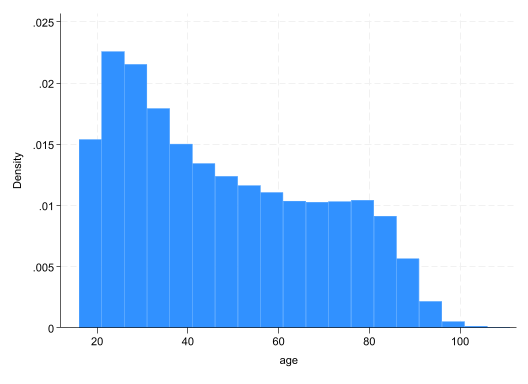

In [4]:
histogram age, width(5)


This table holds one randomly selected diagnostic code found during the observation period. The table is truncated to only include diagnostic codes with a count of 10 or more.

In [5]:
set linesize 132
groups description , select(f >= 10) ord(h) table 


  +-----------------------------------------------------------------------------------+
  |                                             description   Freq.   Percent     %<= |
  |-----------------------------------------------------------------------------------|
  |                                            Osteoporosis    4271     90.95   90.95 |
  |                         Osteoporotic vertebral collapse      93      1.98   92.93 |
  |                                  Vertebral osteoporosis      47      1.00   93.93 |
  |                                   Pathological fracture      44      0.94   94.87 |
  |                                        Osteoporosis NOS      42      0.89   95.76 |
  |-----------------------------------------------------------------------------------|
  |                                   Osteoporotic kyphosis      35      0.75   96.51 |
  |                                    Primary osteoporosis      25      0.53   97.04 |
  |              Osteoporotic f

These tables holds one randomly selected prescrption during the observation period. The table is truncated to only include codes with a count of 10 or more.


In [6]:
set linesize 132
groups bnf_code , select(f >= 10) ord(h) table 


  +---------------------------------------------------------------+
  |                            bnf_code   Freq.   Percent     %<= |
  |---------------------------------------------------------------|
  |                     Bisphosphonates   15328     99.86   99.86 |
  | Calcitonins and parathyroid hormone      11      0.07   99.93 |
  +---------------------------------------------------------------+


### Results
#### Overall

In [7]:
diagt diag test


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     3,674      1,022 |     4,696 
    Normal |    11,676    408,628 |   420,304 
-----------+----------------------+----------
     Total |    15,350    409,650 |   425,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.1%      1.1%       1.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     78.2%     77.0%     79.4%
Specificity                      Pr(-|N)     97.2%     97.2%     97.3%
ROC area               (Sens. + Spec.)/2      0.88      0.87      0.88 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     28.16     27.

#### Males

In [8]:
diagt diag test if sex==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       614        212 |       826 
    Normal |     2,674    204,785 |   207,459 
-----------+----------------------+----------
     Total |     3,288    204,997 |   208,285 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.4%      0.4%       0.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     74.3%     71.2%     77.3%
Specificity                      Pr(-|N)     98.7%     98.7%     98.8%
ROC area               (Sens. + Spec.)/2      0.87      0.85      0.88 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     57.67     54.

#### Females

In [9]:
diagt diag test if sex==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     3,060        810 |     3,870 
    Normal |     9,002    203,834 |   212,836 
-----------+----------------------+----------
     Total |    12,062    204,644 |   216,706 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.8%      1.7%       1.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     79.1%     77.8%     80.3%
Specificity                      Pr(-|N)     95.8%     95.7%     95.9%
ROC area               (Sens. + Spec.)/2      0.87      0.87      0.88 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     18.69     18.

#### Age
*16-30*

In [10]:
diagt diag test if agecat==16


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |        17         12 |        29 
    Normal |        45    117,600 |   117,645 
-----------+----------------------+----------
     Total |        62    117,612 |   117,674 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.0%      0.0%       0.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     58.6%     38.9%     76.5%
Specificity                      Pr(-|N)    100.0%     99.9%    100.0%
ROC area               (Sens. + Spec.)/2      0.79      0.70      0.88 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    1532.54   1004

*30-69*

In [11]:
diagt diag test if agecat==30


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,004        303 |     1,307 
    Normal |     2,715    217,373 |   220,088 
-----------+----------------------+----------
     Total |     3,719    217,676 |   221,395 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.6%      0.6%       0.6%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     76.8%     74.4%     79.1%
Specificity                      Pr(-|N)     98.8%     98.7%     98.8%
ROC area               (Sens. + Spec.)/2      0.88      0.87      0.89 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     62.27     59.

*>69*

In [12]:
diagt diag test if agecat==70


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,653        707 |     3,360 
    Normal |     8,916     73,655 |    82,571 
-----------+----------------------+----------
     Total |    11,569     74,362 |    85,931 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      3.9%      3.8%       4.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     79.0%     77.5%     80.3%
Specificity                      Pr(-|N)     89.2%     89.0%     89.4%
ROC area               (Sens. + Spec.)/2      0.84      0.83      0.85 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      7.31      7.

#### Year at start of oberservation period 
*2004-2009*

In [13]:
diagt diag test if yearcat==2004


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,640        263 |     1,903 
    Normal |     4,855    143,242 |   148,097 
-----------+----------------------+----------
     Total |     6,495    143,505 |   150,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.3%      1.2%       1.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     86.2%     84.5%     87.7%
Specificity                      Pr(-|N)     96.7%     96.6%     96.8%
ROC area               (Sens. + Spec.)/2      0.91      0.91      0.92 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     26.29     25.

*2010-2015*

In [14]:
diagt diag test if yearcat==2010


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,245        350 |     1,595 
    Normal |     4,182    144,223 |   148,405 
-----------+----------------------+----------
     Total |     5,427    144,573 |   150,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.1%      1.0%       1.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     78.1%     75.9%     80.1%
Specificity                      Pr(-|N)     97.2%     97.1%     97.3%
ROC area               (Sens. + Spec.)/2      0.88      0.87      0.89 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     27.70     26.

*2016-2020*

In [15]:
diagt diag test if yearcat==2016


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       789        409 |     1,198 
    Normal |     2,639    121,163 |   123,802 
-----------+----------------------+----------
     Total |     3,428    121,572 |   125,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.0%      0.9%       1.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     65.9%     63.1%     68.5%
Specificity                      Pr(-|N)     97.9%     97.8%     97.9%
ROC area               (Sens. + Spec.)/2      0.82      0.81      0.83 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     30.90     29.

#### IMD of practice
*1-3*

In [16]:
diagt diag test if imdcat==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,067        337 |     1,404 
    Normal |     3,450    149,697 |   153,147 
-----------+----------------------+----------
     Total |     4,517    150,034 |   154,551 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.9%      0.9%       1.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     76.0%     73.7%     78.2%
Specificity                      Pr(-|N)     97.7%     97.7%     97.8%
ROC area               (Sens. + Spec.)/2      0.87      0.86      0.88 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     33.74     32.

*4-7*

In [17]:
diagt diag test if imdcat==4


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,461        380 |     1,841 
    Normal |     4,581    136,623 |   141,204 
-----------+----------------------+----------
     Total |     6,042    137,003 |   143,045 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.3%      1.2%       1.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     79.4%     77.4%     81.2%
Specificity                      Pr(-|N)     96.8%     96.7%     96.8%
ROC area               (Sens. + Spec.)/2      0.88      0.87      0.89 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     24.46     23.

*8-10*

In [18]:
diagt diag test if imdcat==8


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,144        302 |     1,446 
    Normal |     3,640    119,729 |   123,369 
-----------+----------------------+----------
     Total |     4,784    120,031 |   124,815 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.2%      1.1%       1.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     79.1%     76.9%     81.2%
Specificity                      Pr(-|N)     97.0%     97.0%     97.1%
ROC area               (Sens. + Spec.)/2      0.88      0.87      0.89 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     26.81     25.

#### Commissioning Regions
EAST OF ENGLAND

In [19]:
diagt diag test if regexm(region_name,"ENGLAND")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       698        189 |       887 
    Normal |     2,738     86,012 |    88,750 
-----------+----------------------+----------
     Total |     3,436     86,201 |    89,637 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.0%      0.9%       1.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     78.7%     75.8%     81.3%
Specificity                      Pr(-|N)     96.9%     96.8%     97.0%
ROC area               (Sens. + Spec.)/2      0.88      0.86      0.89 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     25.51     24.

London

In [20]:
diagt diag test if regexm(region_name,"LONDON")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |        68         31 |        99 
    Normal |       202     16,424 |    16,626 
-----------+----------------------+----------
     Total |       270     16,455 |    16,725 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.6%      0.5%       0.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     68.7%     58.6%     77.6%
Specificity                      Pr(-|N)     98.8%     98.6%     98.9%
ROC area               (Sens. + Spec.)/2      0.84      0.79      0.88 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     56.53     46.

Midlands

In [21]:
diagt diag test if regexm(region_name,"MID")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       442        153 |       595 
    Normal |     1,295     44,653 |    45,948 
-----------+----------------------+----------
     Total |     1,737     44,806 |    46,543 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.3%      1.2%       1.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     74.3%     70.6%     77.8%
Specificity                      Pr(-|N)     97.2%     97.0%     97.3%
ROC area               (Sens. + Spec.)/2      0.86      0.84      0.87 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     26.36     24.

Yorkshire

In [22]:
diagt diag test if regexm(region_name,"YORK")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       687        212 |       899 
    Normal |     2,054     83,158 |    85,212 
-----------+----------------------+----------
     Total |     2,741     83,370 |    86,111 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.0%      1.0%       1.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     76.4%     73.5%     79.2%
Specificity                      Pr(-|N)     97.6%     97.5%     97.7%
ROC area               (Sens. + Spec.)/2      0.87      0.86      0.88 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     31.70     29.

North West

In [23]:
diagt diag test if regexm(region_name,"NORTH")==1 & regexm(region_name,"WEST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       418        125 |       543 
    Normal |     1,020     46,030 |    47,050 
-----------+----------------------+----------
     Total |     1,438     46,155 |    47,593 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.1%      1.0%       1.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     77.0%     73.2%     80.5%
Specificity                      Pr(-|N)     97.8%     97.7%     98.0%
ROC area               (Sens. + Spec.)/2      0.87      0.86      0.89 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     35.51     32.

South East

In [24]:
diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"EAST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       863        184 |     1,047 
    Normal |     2,616     86,822 |    89,438 
-----------+----------------------+----------
     Total |     3,479     87,006 |    90,485 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.2%      1.1%       1.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     82.4%     80.0%     84.7%
Specificity                      Pr(-|N)     97.1%     97.0%     97.2%
ROC area               (Sens. + Spec.)/2      0.90      0.89      0.91 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     28.18     26.

South West

In [25]:
diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"WEST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       408        108 |       516 
    Normal |     1,443     34,217 |    35,660 
-----------+----------------------+----------
     Total |     1,851     34,325 |    36,176 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.4%      1.3%       1.6%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     79.1%     75.3%     82.5%
Specificity                      Pr(-|N)     96.0%     95.7%     96.2%
ROC area               (Sens. + Spec.)/2      0.88      0.86      0.89 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     19.54     18.

#### System
SystmOne

In [26]:
diagt diag test if regexm(system,"One")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,845        536 |     2,381 
    Normal |     6,825    219,549 |   226,374 
-----------+----------------------+----------
     Total |     8,670    220,085 |   228,755 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.0%      1.0%       1.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     77.5%     75.8%     79.2%
Specificity                      Pr(-|N)     97.0%     96.9%     97.1%
ROC area               (Sens. + Spec.)/2      0.87      0.86      0.88 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     25.70     24.

Vision

In [27]:
diagt diag test if regexm(system,"Vision")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       111         26 |       137 
    Normal |       394     13,213 |    13,607 
-----------+----------------------+----------
     Total |       505     13,239 |    13,744 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.0%      0.8%       1.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     81.0%     73.4%     87.2%
Specificity                      Pr(-|N)     97.1%     96.8%     97.4%
ROC area               (Sens. + Spec.)/2      0.89      0.86      0.92 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     27.98     24.

EMIS

In [28]:
diagt diag test if regexm(ustrupper(system),"EMIS")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,717        460 |     2,177 
    Normal |     4,445    175,743 |   180,188 
-----------+----------------------+----------
     Total |     6,162    176,203 |   182,365 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.2%      1.1%       1.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     78.9%     77.1%     80.6%
Specificity                      Pr(-|N)     97.5%     97.5%     97.6%
ROC area               (Sens. + Spec.)/2      0.88      0.87      0.89 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     31.97     30.

#### RA_Index
Index==1

In [29]:
diagt diag test if RA_index==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,869        807 |     3,676 
    Normal |     8,632    309,389 |   318,021 
-----------+----------------------+----------
     Total |    11,501    310,196 |   321,697 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.1%      1.1%       1.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     78.0%     76.7%     79.4%
Specificity                      Pr(-|N)     97.3%     97.2%     97.3%
ROC area               (Sens. + Spec.)/2      0.88      0.87      0.88 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     28.75     27.

Index==0

In [30]:
diagt diag test if RA_index==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       805        215 |     1,020 
    Normal |     3,044     99,239 |   102,283 
-----------+----------------------+----------
     Total |     3,849     99,454 |   103,303 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.0%      0.9%       1.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     78.9%     76.3%     81.4%
Specificity                      Pr(-|N)     97.0%     96.9%     97.1%
ROC area               (Sens. + Spec.)/2      0.88      0.87      0.89 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     26.52     25.

#### Ethnicity
Ethnicity==0000white

In [31]:
diagt diag test if ethnicity=="0white"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,577        775 |     3,352 
    Normal |     8,191    246,438 |   254,629 
-----------+----------------------+----------
     Total |    10,768    247,213 |   257,981 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.3%      1.3%       1.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     76.9%     75.4%     78.3%
Specificity                      Pr(-|N)     96.8%     96.7%     96.9%
ROC area               (Sens. + Spec.)/2      0.87      0.86      0.88 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     23.90     23.

In [32]:
diagt diag test if ethnicity=="Other"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       116         47 |       163 
    Normal |       298     43,407 |    43,705 
-----------+----------------------+----------
     Total |       414     43,454 |    43,868 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.4%      0.3%       0.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     71.2%     63.6%     78.0%
Specificity                      Pr(-|N)     99.3%     99.2%     99.4%
ROC area               (Sens. + Spec.)/2      0.85      0.82      0.89 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    104.37     89.

In [33]:
diagt diag test if ethnicity=="Missing"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       981        200 |     1,181 
    Normal |     3,187    118,783 |   121,970 
-----------+----------------------+----------
     Total |     4,168    118,983 |   123,151 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.0%      0.9%       1.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     83.1%     80.8%     85.2%
Specificity                      Pr(-|N)     97.4%     97.3%     97.5%
ROC area               (Sens. + Spec.)/2      0.90      0.89      0.91 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     31.79     30.

In [34]:
tempname memhold
postfile `memhold' str20 var prev sens spec ppv npv roc using "validity.dta",replace

quietly diagt diag test
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("all") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if sex==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Male") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if sex==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Female") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==16
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age young") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==30
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age middle") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==70
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age elderly") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if yearcat==2004
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2004-2009") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if yearcat==2010
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2010-2015") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc')

quietly diagt diag test if yearcat==2016
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2016-2020") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if imdcat==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 1,3") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if imdcat==4
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 4,7") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if imdcat==8
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 8,10") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if regexm(region_name,"LONDON")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("London") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"MID")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Midlands") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"YORK")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Yorkshire") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"NORTH")==1 & regexm(region_name,"WEST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("North West") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"EAST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("South East") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"WEST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("South West") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(system,"One")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("SystemOne") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(system,"Vision")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Vision") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(ustrupper(system),"EMIS")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("EMIS") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if RA_index==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("RAIndex1") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if RA_index==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("RAIndex0") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if ethnicity=="0white"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_0white") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if ethnicity=="Other"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_Other") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 



quietly diagt diag test if ethnicity=="Missing"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_Missing") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

postclose `memhold'

### Logistic Regression
#### PPV

In [35]:
drop if missing(imdcat)
drop if missing(sex)

(2,589 observations deleted)
(9 observations deleted)


In [36]:
logistic diag_pos if test==1


Logistic regression                                     Number of obs = 15,343
                                                        LR chi2(0)    =   0.00
                                                        Prob > chi2   =      .
Log likelihood = -8443.3046                             Pseudo R2     = 0.0000

------------------------------------------------------------------------------
    diag_pos |       Odds   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       _cons |    .314626   .0059531   -61.11   0.000     .3031718    .3265129
------------------------------------------------------------------------------


In [37]:
gen newdiag=diag_pos

melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model1


Fitting fixed-effects model:

Iteration 0:  Log likelihood = -8344.2633  
Iteration 1:  Log likelihood = -8329.1815  
Iteration 2:  Log likelihood = -8329.1685  
Iteration 3:  Log likelihood = -8329.1685  

Refining starting values:

Grid node 0:  Log likelihood = -8281.6595

Fitting full model:

Iteration 0:  Log likelihood = -8281.6595  (not concave)
Iteration 1:  Log likelihood = -8235.1944  
Iteration 2:  Log likelihood = -8220.1565  
Iteration 3:  Log likelihood = -8219.3006  
Iteration 4:  Log likelihood = -8219.2922  
Iteration 5:  Log likelihood = -8219.2922  

Mixed-effects logistic regression               Number of obs     =     15,286
Group variable: practice_id                     Number of groups  =        314

                                                Obs per group:
                                                              min =          1
                                                              avg =       48.7
                                           

##### Likelihood ratio tests

In [38]:


quietly: melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.ethnic if test==1 || practice_id:,or
estimates store model_imd

quietly:melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.imdcat if test==1 || practice_id:,or
estimates store model_ethnicity

quietly:melogit newdiag i.yearcat i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_sex

quietly:melogit newdiag i.sex i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_year

quietly: melogit newdiag i.sex i.yearcat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_age



In [39]:
lrtest model1 model_sex
lrtest model1 model_year
lrtest model1 model_age
lrtest model1 model_ethnicity
lrtest model1 model_imd



Likelihood-ratio test
Assumption: model_sex nested within model1

 LR chi2(1) =  68.03
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_year nested within model1

 LR chi2(2) =  13.35
Prob > chi2 = 0.0013

Likelihood-ratio test
Assumption: model_age nested within model1

 LR chi2(2) =  32.40
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_ethnic~y nested within model1

 LR chi2(2) =   3.56
Prob > chi2 = 0.1686

Likelihood-ratio test
Assumption: model_imd nested within model1

 LR chi2(2) =   0.91
Prob > chi2 = 0.6355


#### NPV

In [40]:
logistic diag_neg if test==0


Logistic regression                                    Number of obs = 407,059
                                                       LR chi2(0)    =    0.00
                                                       Prob > chi2   =       .
Log likelihood = -7121.6725                            Pseudo R2     =  0.0000

------------------------------------------------------------------------------
    diag_neg |       Odds   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       _cons |   398.4691   12.49833   190.90   0.000     374.7106     423.734
------------------------------------------------------------------------------


In [41]:
/* need to use the same response variable (newdiag) to line up the two model results */
replace newdiag=diag_neg 

melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2

(422,402 real changes made)

Fitting fixed-effects model:

Iteration 0:  Log likelihood = -37044.173  
Iteration 1:  Log likelihood = -7061.1024  
Iteration 2:  Log likelihood = -6332.6306  
Iteration 3:  Log likelihood = -6120.5508  
Iteration 4:  Log likelihood = -6102.0506  
Iteration 5:  Log likelihood = -6101.2769  
Iteration 6:  Log likelihood = -6101.2747  
Iteration 7:  Log likelihood = -6101.2747  

Refining starting values:

Grid node 0:  Log likelihood = -6132.6555

Fitting full model:

Iteration 0:  Log likelihood = -6132.6555  (not concave)
Iteration 1:  Log likelihood = -6098.3769  
Iteration 2:  Log likelihood = -6085.1305  
Iteration 3:  Log likelihood = -6083.9534  
Iteration 4:  Log likelihood = -6083.9476  
Iteration 5:  Log likelihood = -6083.9476  

Mixed-effects logistic regression               Number of obs     =    406,147
Group variable: practice_id                     Number of groups  =        336

                                                Obs per grou

##### Likelihood ratio tests

In [42]:

quietly: melogit newdiag i.yearcat i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_sex
quietly: melogit newdiag i.sex i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_year
quietly: melogit newdiag i.sex i.yearcat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_age
quietly: melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.imdcat if test==0 || practice_id:,or
estimates store model2_ethnicity
quietly: melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.ethnic if test==0 || practice_id:,or
estimates store model2_imd


In [43]:
lrtest model2 model2_sex
lrtest model2 model2_year
lrtest model2 model2_age
lrtest model2 model2_ethnicity
lrtest model2 model2_imd



Likelihood-ratio test
Assumption: model2_sex nested within model2

 LR chi2(1) = 339.91
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_year nested within model2

 LR chi2(2) = 101.57
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_age nested within model2

 LR chi2(2) = 1410.32
Prob > chi2 =  0.0000

Likelihood-ratio test
Assumption: model2_ethni~y nested within model2

 LR chi2(2) =  29.26
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_imd nested within model2

 LR chi2(2) =   1.77
Prob > chi2 = 0.4125


In [44]:
etable, estimates(model1 model2) showstars showstarsnote title("Table 2. PPV (1) and NPV (2),  OR, Random effect") cstat(_r_b,nformat(%6.2f)) column(index) export(validity2.xlsx, modify sheet(reg_osteoporosis, replace))


Table 2. PPV (1) and NPV (2), OR, Random effect
--------------------------------------------------------------------
                                                    1         2     
--------------------------------------------------------------------
sex_coded                                                           
  1                                              0.66 **     3.65 **
yearcat                                                             
  2010-2015                                      0.85 **     0.65 **
  2016-2020                                      0.87 **     0.43 **
agecat                                                              
  0Middle                                        0.91        0.07 **
  Elderly                                        0.71        0.01 **
region                                                              
  LONDON COMMISSIONING REGION                    1.30        0.74   
  MIDLANDS COMMISSIONING REGION                  1.29 

### Summary of validation parameters

In [45]:
use validity.dta, clear
replace prev=round(prev, 0.1)
gen prev_a=round(((prev/100)*((sens/100)+(spec/100)-1)+1-(spec/100))*100,0.1)/*apparent prevalence*/
replace sens=round(sens, 0.1)
replace spec=round(spec,0.1)
replace ppv=round(ppv, 0.1)
replace npv=round(npv, 0.1)
replace roc=round(roc, 0.01)


(26 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)


In [46]:
%head 50

,var,prev,sens,spec,ppv,npv,roc,prev_a
1,all,1.1,78.2,97.2,23.9,99.8,.88,3.6
2,Male,.4,74.3,98.7,18.7,99.9,.87,1.6
3,Female,1.8,79.1,95.8,25.4,99.6,.87,5.6
4,Age young,0,58.6,100,27.4,100,.79,0
5,Age middle,.6,76.8,98.8,27,99.9,.88,1.7
6,Age elderly,3.9,79,89.2,22.9,99,.84,13.5
7,Year 2004-2009,1.3,86.2,96.7,25.3,99.8,.91,4.4
8,Year 2010-2015,1.1,78.1,97.2,22.9,99.8,.88,3.6
9,Year 2016-2020,1,65.9,97.9,23,99.7,.82,2.8
10,"IMD 1,3",.9,76,97.7,23.6,99.8,.87,2.9


In [47]:
/*texsave * using test3.tex, varlabels*/
export excel using  validity2.xlsx, sheet(val_osteoporosis, replace)

file validity2.xlsx saved
